In [1]:
#importing packages
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
plt.style.use('ggplot')
from scipy.stats import norm
from scipy import stats
%matplotlib inline

In [3]:
#so all DataFrame data is displayed
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 1000)

In [4]:
ZRI = pd.read_csv('./data/Zip_Zri_MultiFamilyResidenceRental.csv', index_col=0,dtype={'RegionName': 'str'})

In [5]:
ZRI.shape

(1861, 119)

In [6]:
#melt zri dataframe
ZRI_f = pd.melt(ZRI, id_vars =['RegionName', 'City', 'State', 'Metro', 'CountyName', 'SizeRank'], value_vars=ZRI.iloc[:,6:119])


In [89]:
ZRI_f[ZRI_f.value == 0]

,RegionName,City,State,Metro,CountyName,SizeRank,variable,value,LogValue,Month,Year,Season


In [78]:
ZRI_f.columns[ZRI_f.isnull().any()]

Index(['Metro'], dtype='object')

Text(0.5, 1.0, 'ZRI Distribution')

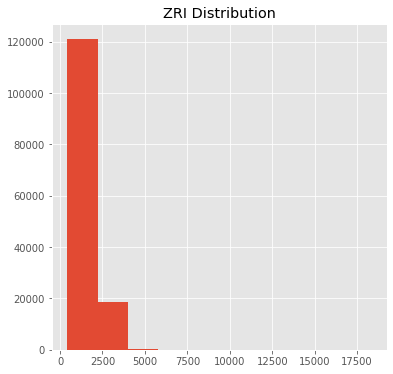

In [7]:
plt.figure(figsize=(6,6))
ZRI_f['value'].hist()
plt.title('ZRI Distribution')

In [11]:
print('Rent Mean: ', np.mean(ZRI_f.value))
print('Rent Median: ', (ZRI_f.value).median())

upper_lim = np.mean(ZRI_f.value) + 3 * np.std(ZRI_f.value)
lower_lim = np.mean(ZRI_f.value) - 3 * np.std(ZRI_f.value)
print('Outliers are above %.2f and below %.2f' % (upper_lim, lower_lim))

Rent Mean:  1518.0649123433427
Rent Median:  1395.0
Outliers are above 3436.70 and below -400.57


Text(0.5, 1.0, 'Log Rent Distribution')

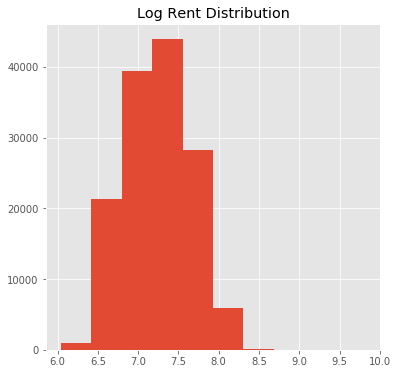

In [12]:
ZRI_f['LogValue'] = np.log(ZRI_f.value)
plt.figure(figsize=(6,6))
ZRI_f['LogValue'].hist()
plt.title('Log Rent Distribution')

In [13]:
print('Log Rent Mean: %.1f' % np.mean(ZRI_f['LogValue']))

upper_lim = np.mean(ZRI_f['LogValue']) + 3.5 * np.std(ZRI_f['LogValue'])
lower_lim = np.mean(ZRI_f['LogValue']) - 3.5 * np.std(ZRI_f['LogValue'])
print('Outliers are above %.1f and below %.1f' % (upper_lim, lower_lim))

Log Rent Mean: 7.2
Outliers are above 8.7 and below 5.8


In [15]:
ZRI_f[ZRI_f.LogValue > 8.7].sort_values('LogValue', ascending=False)

,RegionName,City,State,Metro,CountyName,SizeRank,variable,value,LogValue
181886,11901,Riverhead,NY,New York-Newark-Jersey City,Suffolk County,1370,2018-10,18349.0,9.817330
200496,11901,Riverhead,NY,New York-Newark-Jersey City,Suffolk County,1370,2019-08,17943.0,9.794955
161415,11901,Riverhead,NY,New York-Newark-Jersey City,Suffolk County,1370,2017-11,15445.0,9.645041
168859,11901,Riverhead,NY,New York-Newark-Jersey City,Suffolk County,1370,2018-03,13434.0,9.505544
170720,11901,Riverhead,NY,New York-Newark-Jersey City,Suffolk County,1370,2018-04,13427.0,9.505023


In [16]:
ZRI_f[ZRI_f.LogValue < 5.8].sort_values('LogValue', ascending=False)

,RegionName,City,State,Metro,CountyName,SizeRank,variable,value,LogValue


In [17]:
#remove outliers
ZRI_f = ZRI_f[(ZRI_f.LogValue < 8.7)]

In [18]:
ZRI_f[ZRI_f.LogValue > 8.7].sort_values('LogValue', ascending=False)

,RegionName,City,State,Metro,CountyName,SizeRank,variable,value,LogValue


/Users/isa.adls/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Text(0.5, 1.0, 'Log Rent Distribution')

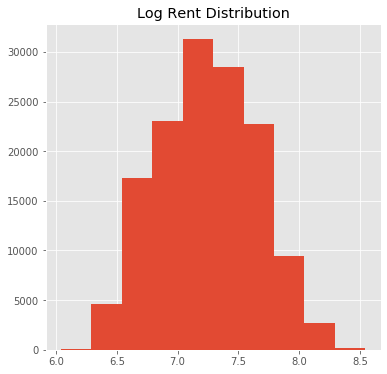

In [19]:
ZRI_f['LogValue'] = np.log(ZRI_f.value)
plt.figure(figsize=(6,6))
ZRI_f['LogValue'].hist()
plt.title('Log Rent Distribution')

Text(0.5, 1.0, 'Rent Distribution')

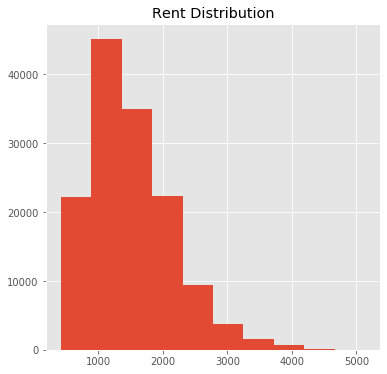

In [20]:
plt.figure(figsize=(6,6))
ZRI_f['value'].hist()
plt.title('Rent Distribution')

In [21]:
ZRI_f.head()

,RegionName,City,State,Metro,CountyName,SizeRank,variable,value,LogValue
0,10025,New York,NY,New York-Newark-Jersey City,New York County,1,2010-09,2930.0,7.982758
1,60657,Chicago,IL,Chicago-Naperville-Elgin,Cook County,2,2010-09,1447.0,7.277248
2,10023,New York,NY,New York-Newark-Jersey City,New York County,3,2010-09,2797.0,7.936303
4,60614,Chicago,IL,Chicago-Naperville-Elgin,Cook County,5,2010-09,1437.0,7.270313
8,79936,El Paso,TX,El Paso,El Paso County,9,2010-09,982.0,6.889591


In [22]:
ZRI_f['variable'] = pd.to_datetime(ZRI_f['variable'])
ZRI_f['Month'] = ZRI_f['variable'].dt.month
ZRI_f['Year'] = ZRI_f['variable'].dt.year

/Users/isa.adls/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/isa.adls/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/isa.adls/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col

In [23]:
ZRI_f.head()

,RegionName,City,State,Metro,CountyName,SizeRank,variable,value,LogValue,Month,Year
0,10025,New York,NY,New York-Newark-Jersey City,New York County,1,2010-09-01,2930.0,7.982758,9,2010
1,60657,Chicago,IL,Chicago-Naperville-Elgin,Cook County,2,2010-09-01,1447.0,7.277248,9,2010
2,10023,New York,NY,New York-Newark-Jersey City,New York County,3,2010-09-01,2797.0,7.936303,9,2010
4,60614,Chicago,IL,Chicago-Naperville-Elgin,Cook County,5,2010-09-01,1437.0,7.270313,9,2010
8,79936,El Paso,TX,El Paso,El Paso County,9,2010-09-01,982.0,6.889591,9,2010


Text(0.5, 1.0, 'Avg Yearly Rent')

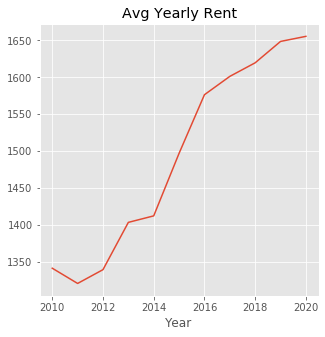

In [24]:
plt.figure(figsize=(5,5))
ZRI_f.groupby('Year').agg({'value':'mean'})['value'].plot()
plt.title('Avg Yearly Rent')

Text(0.5, 1.0, 'Avg Monthly Rent')

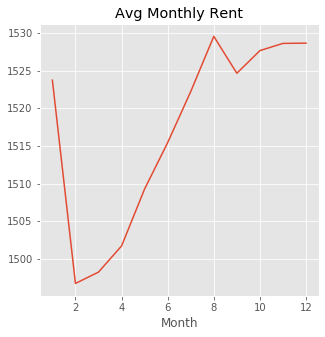

In [26]:
plt.figure(figsize=(5,5))
ZRI_f.groupby('Month').agg({'value':'mean'})['value'].plot()
plt.title('Avg Monthly Rent')

In [27]:
#Add season feature 

def month_to_season(month):
    if month in range(3,5):
        month = 'spring'
    elif month in range(6,8):
        month = 'summer'
    elif month in range(9,11):
        month = 'fall'
    else:
        month = 'winter'
    return(month)

ZRI_f['Season'] = ZRI_f.Month.apply(month_to_season)

/Users/isa.adls/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [28]:
ZRI_f.head()

,RegionName,City,State,Metro,CountyName,SizeRank,variable,value,LogValue,Month,Year,Season
0,10025,New York,NY,New York-Newark-Jersey City,New York County,1,2010-09-01,2930.0,7.982758,9,2010,fall
1,60657,Chicago,IL,Chicago-Naperville-Elgin,Cook County,2,2010-09-01,1447.0,7.277248,9,2010,fall
2,10023,New York,NY,New York-Newark-Jersey City,New York County,3,2010-09-01,2797.0,7.936303,9,2010,fall
4,60614,Chicago,IL,Chicago-Naperville-Elgin,Cook County,5,2010-09-01,1437.0,7.270313,9,2010,fall
8,79936,El Paso,TX,El Paso,El Paso County,9,2010-09-01,982.0,6.889591,9,2010,fall


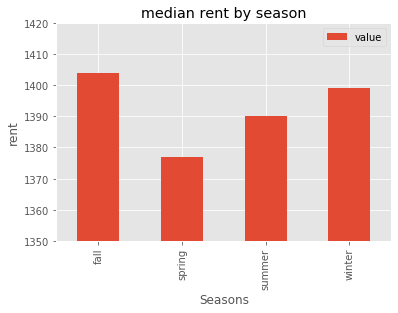

In [29]:
season_rent = ZRI_f.groupby(['Season']).agg({"value": 'median'})

season_rent.plot.bar()
plt.title('median rent by season')
plt.xlabel('Seasons')
plt.ylabel('rent')
plt.ylim(1350,1420)
plt.show()

In [56]:
# calling in other dataframes to get features

laborforce = pd.read_pickle('./data/laborforce.pkl')
IRS = pd.read_pickle('./data/IRS.pkl')
MortDeliq = pd.read_pickle('./data/MortDeliq.pkl')



In [57]:
laborforce.head()

,Year,Labor\nForce,Employed,Unemployed,Unemploy-\nment Rate\n(%),STCOUNTYFP,ZIP
0,2017.0,"26,075","25,062","1,013",3.9,01001,36003
1,2017.0,"26,075","25,062","1,013",3.9,01001,36006
2,2017.0,"26,075","25,062","1,013",3.9,01001,36067
3,2017.0,"26,075","25,062","1,013",3.9,01001,36066
4,2017.0,"26,075","25,062","1,013",3.9,01001,36703


In [90]:
ZRI_f.columns

Index(['RegionName', 'City', 'State', 'Metro', 'CountyName', 'SizeRank',
       'variable', 'value', 'LogValue', 'Month', 'Year', 'Season'],
      dtype='object')

In [33]:
#merge IRS
ZRI_IRS = pd.merge(ZRI_f,IRS,left_on=['RegionName', 'Year'], right_on=['zipcode', 'Year'],how='left')


In [46]:
ZRI_IRS.columns

Index(['RegionName', 'City', 'State', 'Metro', 'CountyName', 'SizeRank',
       'variable', 'value', 'LogValue', 'Month', 'Year', 'Season', 'zipcode',
       'agi_stub', 'NumReturns', 'NUMDEP', 'AGIncome', 'TotIncome',
       'SalariesWages', 'NumUnemply', 'TotTaxes'],
      dtype='object')

In [35]:
ZRI_IRS1119 = ZRI_IRS[ZRI_IRS.Year > 2010]

In [47]:
ZRI_IRS.shape

(140030, 21)

In [48]:
ZRI_IRS1119 = ZRI_IRS1119.drop_duplicates()

In [49]:
ZRI_IRS.shape

(140030, 21)

In [59]:
#merge laborforce
#ZRI_IRS_LF = pd.merge(ZRI_IRS1119,laborforce,left_on=['CountyName', 'Year'], right_on=['COUNTYNAME', 'Year'],how='left')
ZRI_IRS_LF = pd.merge(ZRI_IRS1119,laborforce,left_on=['RegionName', 'Year'], right_on=['ZIP', 'Year'],how='left')


In [60]:
ZRI_IRS_LF.shape

(153179, 27)

In [61]:
ZRI_IRS_LF = ZRI_IRS_LF.drop_duplicates()

In [62]:
ZRI_IRS_LF.shape

(153179, 27)

In [63]:
ZRI_IRS_LF.columns

Index(['RegionName', 'City', 'State', 'Metro', 'CountyName', 'SizeRank',
       'variable', 'value', 'LogValue', 'Month', 'Year', 'Season', 'zipcode',
       'agi_stub', 'NumReturns', 'NUMDEP', 'AGIncome', 'TotIncome',
       'SalariesWages', 'NumUnemply', 'TotTaxes', 'Labor\nForce', 'Employed',
       'Unemployed', 'Unemploy-\nment Rate\n(%)', 'STCOUNTYFP', 'ZIP'],
      dtype='object')

In [64]:
ZRI_IRS_LF.rename(columns={"RegionName": "ZIPCODE", "STCOUNTYFP": "FIPSCode", "variable": "Year-Month"}, inplace=True)
ZRI_IRS_LF.head(1)

,ZIPCODE,City,State,Metro,CountyName,SizeRank,Year-Month,value,LogValue,Month,Year,Season,zipcode,agi_stub,NumReturns,NUMDEP,AGIncome,TotIncome,SalariesWages,NumUnemply,TotTaxes,Labor\nForce,Employed,Unemployed,Unemploy-\nment Rate\n(%),FIPSCode,ZIP
0,10025,New York,NY,New York-Newark-Jersey City,New York County,1,2011-01-01,2866.0,7.960673,1,2011,winter,10025,3.5,7937.333333,3118.5,945739.0,713181.5,637704.666667,641.333333,102373.333333,"882,224","813,275","68,949",7.8,36061,10025


In [65]:
#merge mortgage with ZIP et al. 
ZRI_IRS_LF_MD = pd.merge(ZRI_IRS_LF, MortDeliq, on=['State', 'CountyName', 'FIPSCode', 'Year-Month'], how='left')


In [66]:
ZRI_IRS_LF_MD = ZRI_IRS_LF_MD.drop_duplicates()

In [92]:
ZRI_IRS_LF_MD = ZRI_IRS_LF_MD[['ZIPCODE', 'City', 'State', 'Metro', 'CountyName', 'SizeRank',\
              'Year-Month', 'value', 'Month', 'Year', 'Season', 'AGIncome', 'TotIncome', 'LogValue', \
              'SalariesWages','NumUnemply', 'TotTaxes', 'FIPSCode','Labor\nForce', \
              'Employed', 'Unemployed', 'Unemploy-\nment Rate\n(%)', 'MortDeliq30-89', 'MortDeliq90']]


KeyError: "['LogValue'] not in index"

In [70]:
ZRI_IRS_LF_MD.shape

(153179, 23)

In [69]:
ZRI_IRS_LF_MD.to_pickle('./data/ZRI_IRS_LF_MD.pkl')

In [88]:
ZRI_IRS_LF_MD.columns

Index(['ZIPCODE', 'City', 'State', 'Metro', 'CountyName', 'SizeRank',
       'Year-Month', 'value', 'Month', 'Year', 'Season', 'AGIncome',
       'TotIncome', 'SalariesWages', 'NumUnemply', 'TotTaxes', 'FIPSCode',
       'Labor\nForce', 'Employed', 'Unemployed', 'Unemploy-\nment Rate\n(%)',
       'MortDeliq30-89', 'MortDeliq90'],
      dtype='object')

                           SizeRank     value     Month      Year  AGIncome  \
SizeRank                   1.000000 -0.024490 -0.000208  0.013637 -0.428426   
value                     -0.024490  1.000000  0.020281  0.167296  0.499477   
Month                     -0.000208  0.020281  1.000000 -0.030653  0.000131   
Year                       0.013637  0.167296 -0.030653  1.000000  0.112541   
AGIncome                  -0.428426  0.499477  0.000131  0.112541  1.000000   
TotIncome                 -0.412197  0.502047  0.000257  0.191803  0.990826   
SalariesWages             -0.563622  0.490081  0.000576  0.129462  0.921840   
NumUnemply                -0.422392  0.042677 -0.000378 -0.501435  0.035549   
TotTaxes                  -0.221526  0.500588 -0.002552 -0.066959  0.802903   
Unemploy-\nment Rate\n(%) -0.047384 -0.099178 -0.003477 -0.782204 -0.148974   
MortDeliq30-89            -0.023017 -0.454599 -0.006842 -0.445923 -0.281062   
MortDeliq90               -0.037048 -0.145700 -0.073

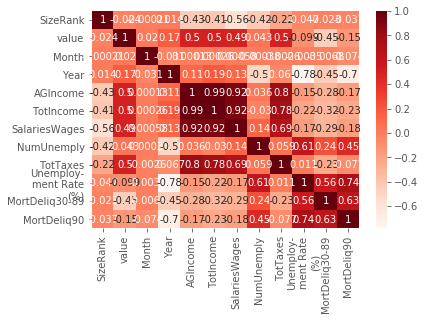

value        1.000000
TotIncome    0.502047
TotTaxes     0.500588
Name: value, dtype: float64


In [87]:
# Create correlation matrix and print it
cor = ZRI_IRS_LF_MD.corr()
print(cor)

# Correlation matrix heatmap
plt.figure()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

# Correlation with output variable
cor_target = abs(cor["value"])

# Selecting highly correlated features
best_features = cor_target[cor_target > .5]
print(best_features)

In [127]:
Testing1 = ZRI_IRS_LF_MD.copy()

In [128]:
Testing1 = Testing1.drop(columns =['ZIPCODE', 'City', 'State', 'Metro', 'CountyName', 'SizeRank'])

In [129]:
Testing1 = Testing1.drop(columns =['Year-Month'])

In [130]:
Testing1 = Testing1.drop(columns =['FIPSCode'])

In [131]:
Testing1.Season = Testing1.Season.replace({'fall':1,'winter':2, 'summer':3, 'spring':4})

In [132]:
Testing1.columns

Index(['value', 'Month', 'Year', 'Season', 'AGIncome', 'TotIncome',
       'SalariesWages', 'NumUnemply', 'TotTaxes', 'Labor\nForce', 'Employed',
       'Unemployed', 'Unemploy-\nment Rate\n(%)', 'MortDeliq30-89',
       'MortDeliq90'],
      dtype='object')

In [134]:
Testing1['Labor\nForce'] = Testing1['Labor\nForce'].str.replace(',','')
Testing1['Employed'] = Testing1['Employed'].str.replace(',','')
Testing1['Unemployed'] = Testing1['Unemployed'].str.replace(',','')

In [135]:
Testing1 = Testing1.apply(pd.to_numeric)

In [136]:
Testing1.head()

,value,Month,Year,Season,AGIncome,TotIncome,SalariesWages,NumUnemply,TotTaxes,Labor\nForce,Employed,Unemployed,Unemploy-\nment Rate\n(%),MortDeliq30-89,MortDeliq90
0,2866.0,1,2011,2,9.457390e+05,7.131815e+05,637704.666667,641.333333,102373.333333,882224.0,813275.0,68949.0,7.8,1.4,2.4
1,1467.0,1,2011,2,6.397498e+05,5.074753e+05,492360.333333,340.500000,34583.666667,2636432.0,2360932.0,275500.0,10.4,3.8,6.1
2,2736.0,1,2011,2,1.543689e+06,1.212594e+06,867954.166667,387.833333,202302.666667,882224.0,813275.0,68949.0,7.8,1.4,2.4
3,1512.0,1,2011,2,9.851315e+05,8.054132e+05,599603.166667,284.333333,59246.166667,2636432.0,2360932.0,275500.0,10.4,3.8,6.1
4,952.0,1,2011,2,3.257645e+05,1.890520e+05,266140.500000,568.166683,8512.333333,346748.0,313903.0,32845.0,9.5,5.6,3.3


In [138]:
Testing1 = Testing1.dropna(subset=['value'])

In [137]:
X = Testing1.drop(columns =["value"]) 
y = Testing1.value


In [139]:
X = X.replace(np.nan, 0)


In [ ]:
# Import modules
from sklearn.svm import SVR
from sklearn.feature_selection import RFECV

# Instantiate estimator and feature selector
svr_mod = SVR(kernel="linear")
feat_selector = RFECV(svr_mod, cv=5)

# Fit
feat_selector = feat_selector.fit(X, y)

# Print support and ranking
print(feat_selector.support_)
print(feat_selector.ranking_)
print(X.columns)

In [ ]:
# Import modules
from sklearn.linear_model import LarsCV

# Drop feature suggested not important in step 2
X = X.drop('...', axis=1)

# Instantiate
lars_mod = LarsCV(cv=5, normalize=False)

# Fit
feat_selector = lars_mod.fit(X, y)

# Print r-squared score and estimated alpha
print(lars_mod.score(X, y))
print(lars_mod.alpha_)

In [ ]:
# look into features correlations 


In [ ]:
corr = pd.concat([X_train, y_train], axis=1).corr()
corr

In [ ]:
#removing outliers
y_train18_2 = y_train18[y_train18.value < 6000]

In [ ]:
pd.concat([X_train['SalariesWages'], y_train18_2['value']], axis=1).plot(kind='scatter', x='SalariesWages', y='value')


In [ ]:
pd.concat([np.log10(X_train['SalariesWages']), np.log10(y_train18_2['value'])], axis=1).plot(kind='scatter', x='SalariesWages', y='value')


In [ ]:
pd.concat([np.log10(X_train['TotTaxes']), np.log10(y_train18_2['value'])], axis=1).plot(kind='scatter', x='TotTaxes', y='value')


In [ ]:
#MortDeliq30-89
pd.concat([np.log10(X_train['MortDeliq30-89']), np.log10(y_train18_2['value'])], axis=1).plot(kind='scatter', x='MortDeliq30-89', y='value')
